In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('poker_train.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25009 entries, 0 to 25008
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       25009 non-null  int64
 1   10      25009 non-null  int64
 2   1.1     25009 non-null  int64
 3   11      25009 non-null  int64
 4   1.2     25009 non-null  int64
 5   13      25009 non-null  int64
 6   1.3     25009 non-null  int64
 7   12      25009 non-null  int64
 8   1.4     25009 non-null  int64
 9   1.5     25009 non-null  int64
 10  9       25009 non-null  int64
dtypes: int64(11)
memory usage: 2.1 MB


In [4]:
data.head()

,1,10,1.1,11,1.2,13,1.3,12,1.4,1.5,9
0,2,11,2,13,2,10,2,12,2,1,9
1,3,12,3,11,3,13,3,10,3,1,9
2,4,10,4,11,4,1,4,13,4,12,9
3,4,1,4,13,4,12,4,11,4,10,9
4,1,2,1,4,1,5,1,3,1,6,8


In [5]:
data.describe()

,1,10,1.1,11,1.2,13,1.3,12,1.4,1.5,9
count,25009.000000,25009.000000,25009.000000,25009.000000,25009.000000,25009.000000,25009.000000,25009.000000,25009.000000,25009.000000,25009.000000
mean,2.508817,6.995122,2.497781,7.014035,2.510296,7.013915,2.495981,6.942261,2.497381,6.962973,0.620817
std,1.116465,3.749832,1.121750,3.766965,1.123130,3.744858,1.115991,3.747086,1.118715,3.741463,0.786594
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,1.000000
75%,4.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,3.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


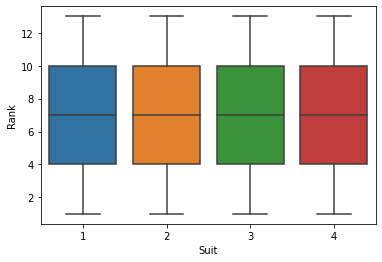

In [6]:
sns.boxplot( x="1",y="10", data=data, )
plt.xlabel("Suit")
plt.ylabel("Rank")
plt.show()

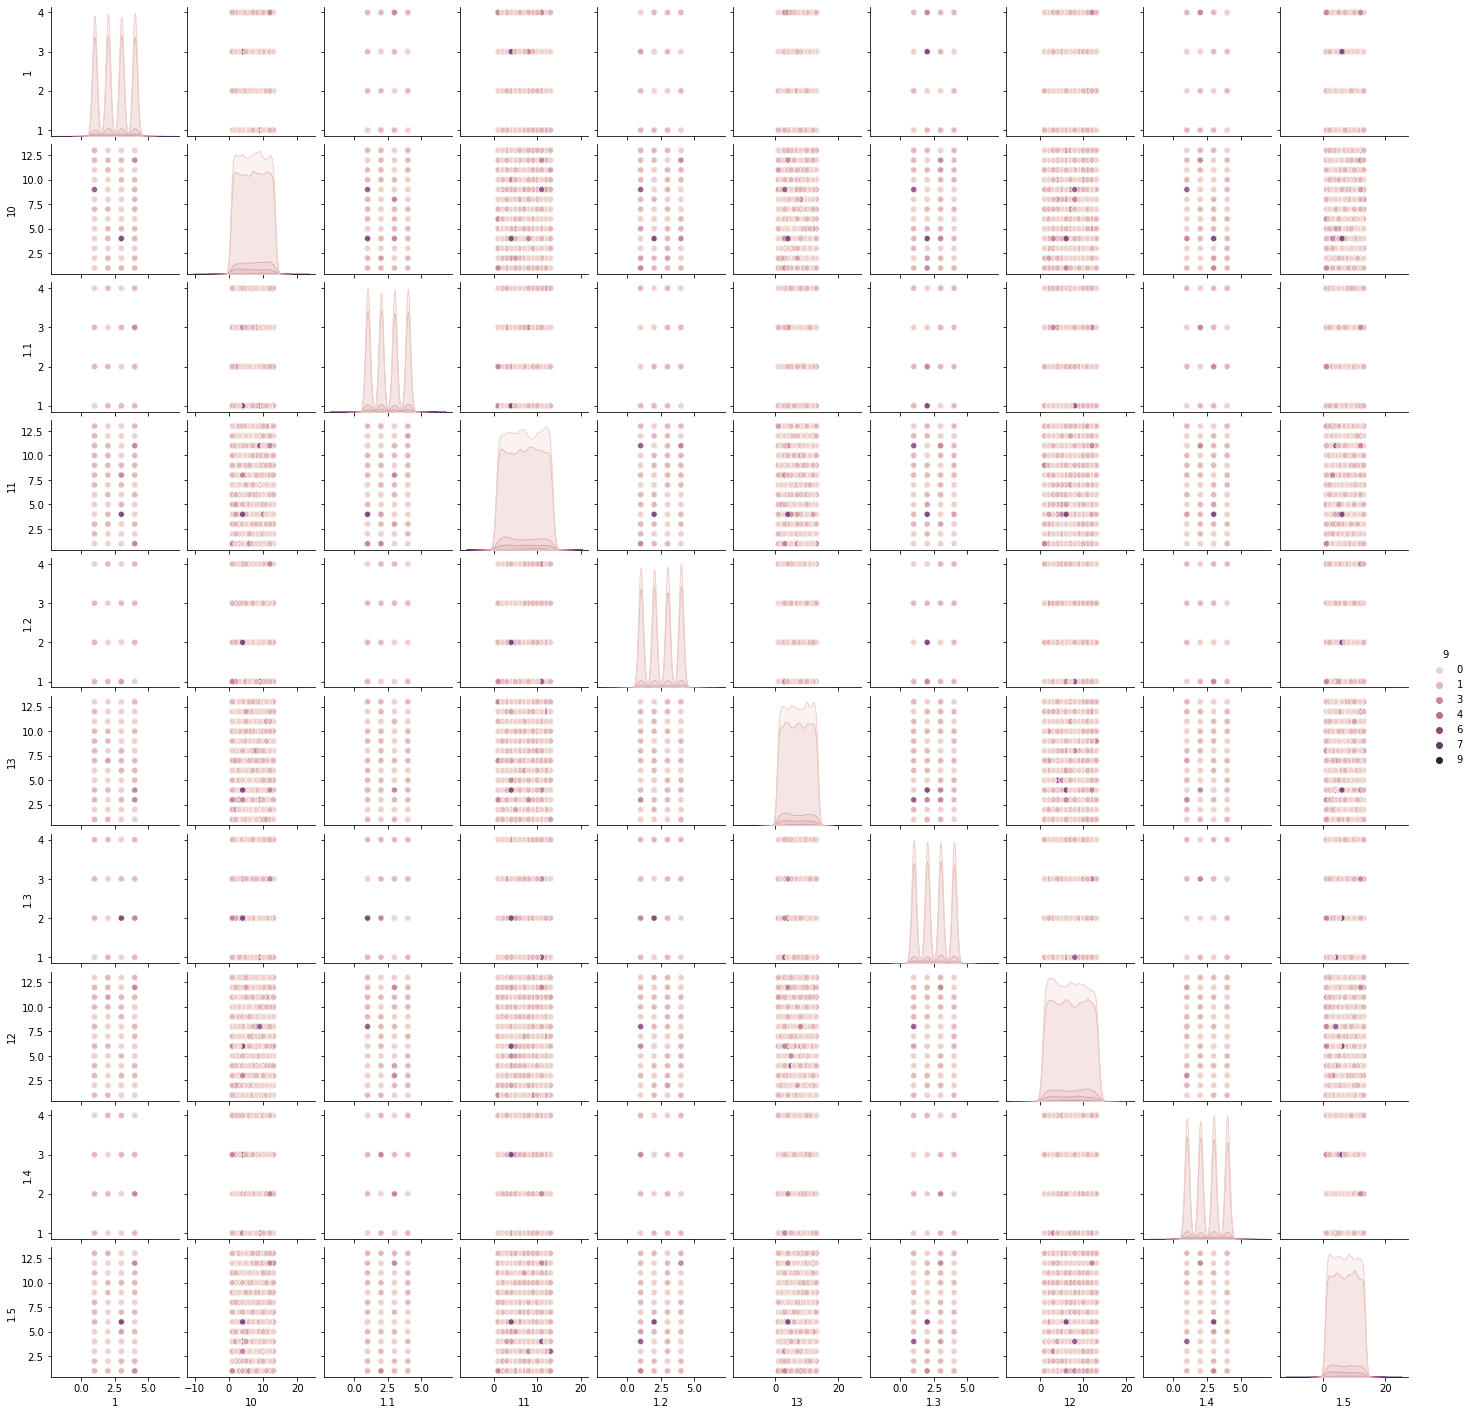

In [7]:
sns.pairplot(data, hue='9', height=2)

In [8]:
X = data.drop(['9'],axis = 1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25009 entries, 0 to 25008
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       25009 non-null  int64
 1   10      25009 non-null  int64
 2   1.1     25009 non-null  int64
 3   11      25009 non-null  int64
 4   1.2     25009 non-null  int64
 5   13      25009 non-null  int64
 6   1.3     25009 non-null  int64
 7   12      25009 non-null  int64
 8   1.4     25009 non-null  int64
 9   1.5     25009 non-null  int64
dtypes: int64(10)
memory usage: 1.9 MB


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [11]:
scaler.mean_

array([2.50881683, 6.99512176, 2.4977808 , 7.01403495, 2.51029629,
       7.01391499, 2.49598145, 6.94226079, 2.49738094, 6.96297333])

In [12]:
scaled_X = scaler.transform(X)
scaled_X

array([[-4.55748411e-01,  1.06803686e+00, -4.43762764e-01, ...,
         1.34980639e+00, -4.44609223e-01, -1.59378612e+00],
       [ 4.39953908e-01,  1.33472084e+00,  4.47719521e-01, ...,
         8.16047594e-01,  4.49291577e-01, -1.59378612e+00],
       [ 1.33565623e+00,  8.01352884e-01,  1.33920181e+00, ...,
         1.61668578e+00,  1.34319238e+00,  1.34629869e+00],
       ...,
       [-4.55748411e-01, -1.59880292e+00, -4.43762764e-01, ...,
        -1.58586697e+00,  1.34319238e+00,  1.61357912e+00],
       [-4.55748411e-01,  1.33472084e+00,  1.33920181e+00, ...,
         1.34980639e+00,  1.34319238e+00,  5.44457378e-01],
       [-1.35145073e+00,  1.30094947e-03,  4.47719521e-01, ...,
         2.82288802e-01,  4.49291577e-01,  9.89650463e-03]])

In [13]:
from sklearn.cluster import KMeans

In [14]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)

In [15]:
kmeans.labels_

array([2, 2, 3, ..., 9, 1, 3], dtype=int32)

In [16]:
kmeans.cluster_centers_

array([[ 2.49617737,  9.68004587,  2.48853211,  4.39717125,  2.51911315,
         9.87347095,  2.50955657,  3.33524465,  2.52522936,  5.21253823],
       [ 2.49047426,  8.33846777,  2.51195784,  4.13376571,  2.57073368,
         9.65585732,  2.4835833 , 10.08431293,  2.49087961, 10.45439805],
       [ 2.51968191,  9.64572565,  2.47594433, 10.49542744,  2.50536779,
         9.29781312,  2.48429423,  9.34751491,  2.51888668,  4.12087475],
       [ 2.55891595,  4.65357423,  2.52710134,  9.88452474,  2.48860958,
         4.18931658,  2.50706991, 10.52710134,  2.50746269,  9.04870385],
       [ 2.4721666 ,  9.84341209,  2.51742091,  4.1690028 ,  2.47096516,
         3.48498198,  2.48898678,  9.26271526,  2.48698438,  4.70845014],
       [ 2.52146728,  5.27511463,  2.45810754,  9.77490621,  2.51271363,
         4.27719883,  2.46060859,  3.98207586,  2.47186328,  3.46185911],
       [ 2.51092571,  3.24116011,  2.4866905 ,  4.6344855 ,  2.51092571,
         9.14183552,  2.52999603,  9.09058403

In [17]:
predicted = kmeans.predict(X)
predicted

array([2, 2, 3, ..., 9, 1, 3], dtype=int32)

In [18]:
sse = {}
for k in range(1, 25):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    elbow_prediction = kmeans.labels_
    #print(elbow_prediction)
    sse[k] = kmeans.inertia_
print(sse)

{1: 1930526.1329921233, 2: 1662590.2931440172, 3: 1499703.067270995, 4: 1370495.3854790295, 5: 1270788.4390720397, 6: 1189291.39397447, 7: 1125419.152737775, 8: 1065067.8386772966, 9: 1007900.3005281487, 10: 958137.5424229593, 11: 926862.3940535825, 12: 892032.7117594277, 13: 864464.9794884017, 14: 832266.3109441157, 15: 798863.5517352332, 16: 769349.6966532283, 17: 756226.3525503227, 18: 743599.1456243822, 19: 731376.9398249694, 20: 719646.0456257482, 21: 703875.0397782113, 22: 692652.0166685227, 23: 677367.1753312775, 24: 666478.3602586982}


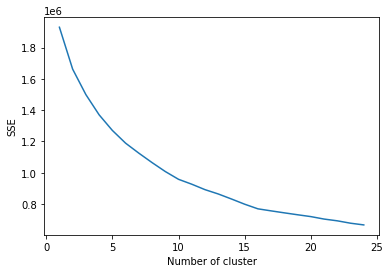

In [19]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

So optimal number of clusters should be around 16

Can't found Canonical Discriminant Analysis, Linear Discriminant Analysis was avaiable.